# Test graph-tool visual tool 
---

In [4]:
"""Import the right packages."""
import os
import sys

import graph_tool.all as gt

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, ".."))
# Import own module
sys.path.append(par_dir)

if True:
    from simulators.meta_simulator import MetaSimulator
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


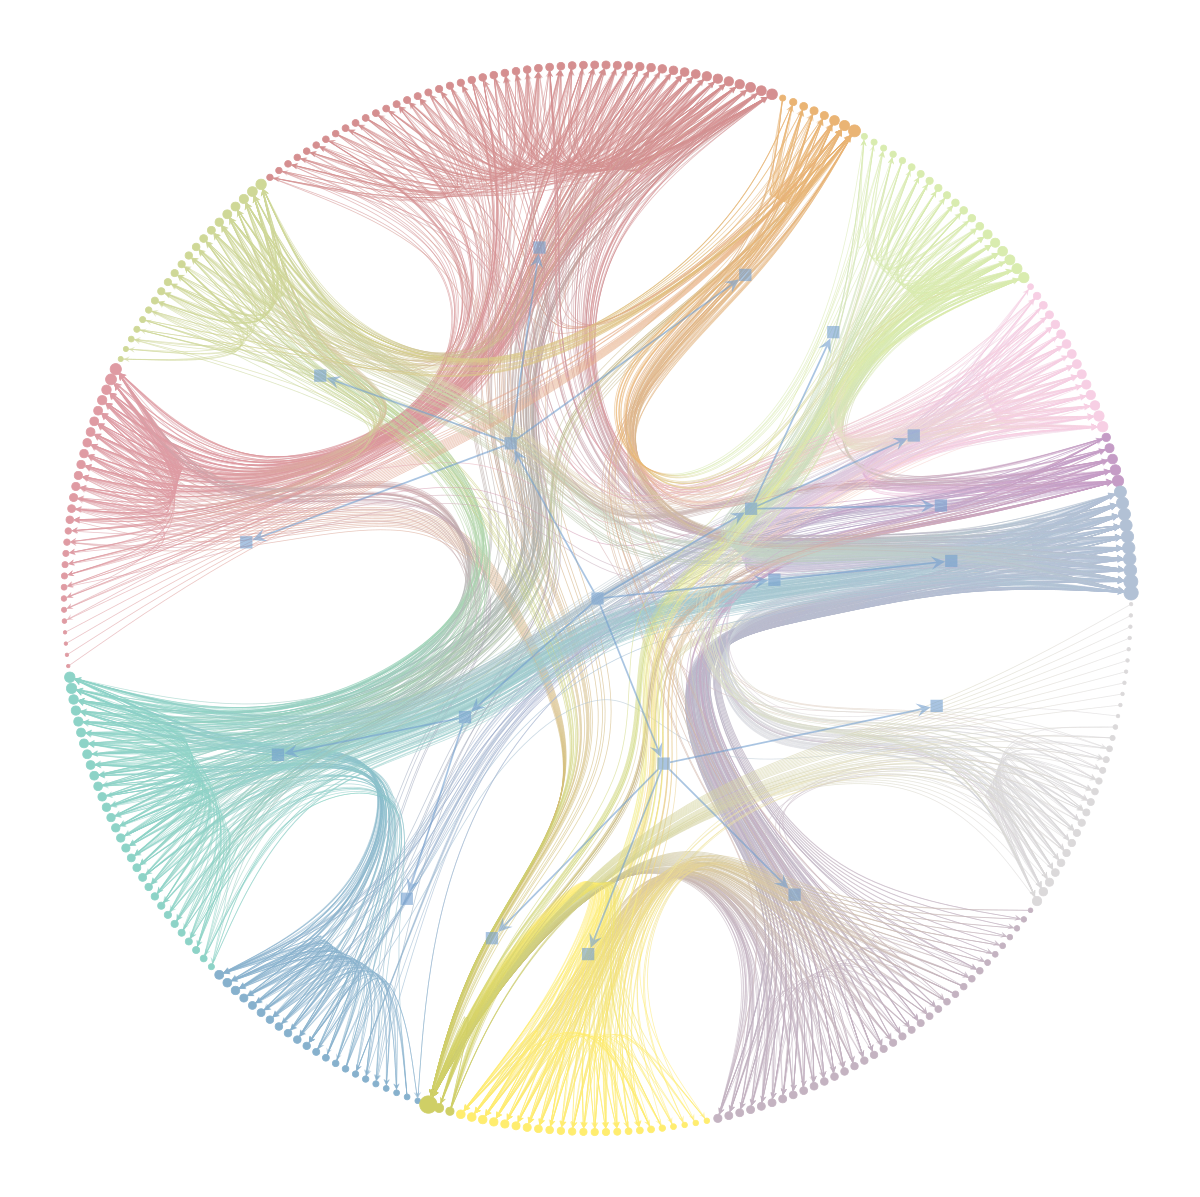

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa898d93a0, at 0x7ffa19776430>,
 <Graph object, directed, with 317 vertices and 316 edges, at 0x7ffa19789610>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa19789610, at 0x7ffa197892e0>)

In [5]:
"""Test if resulting graph is shown to prove graph-tool is installed."""

g = gt.collection.data["celegansneural"]
state = gt.minimize_nested_blockmodel_dl(g)
state.draw()

---
Test if the filtering is working correctly

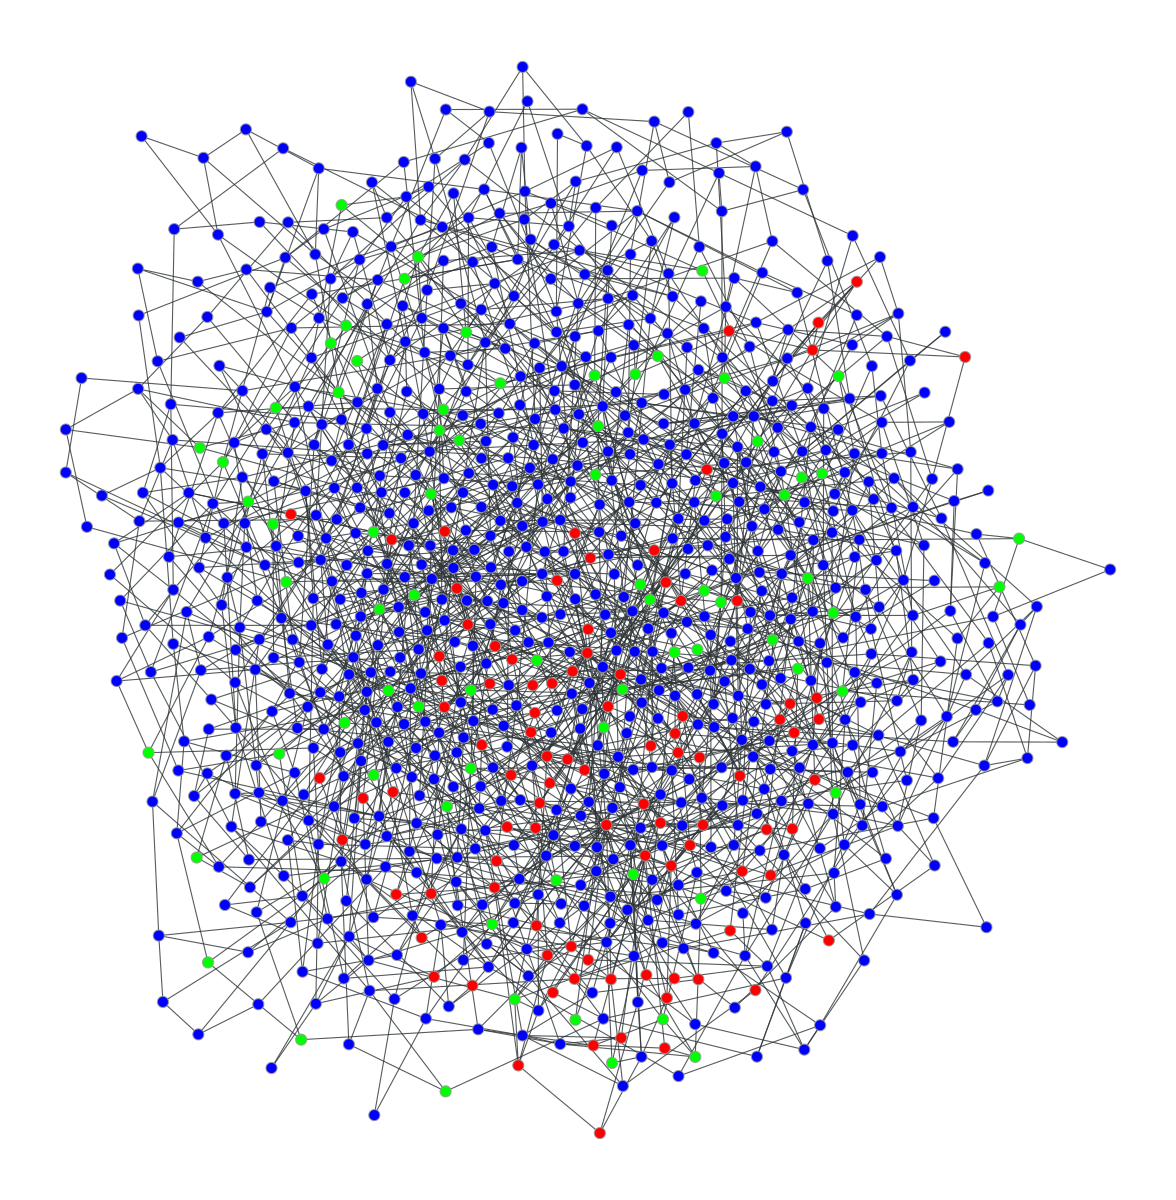

simulators.network.num_vertices()=95


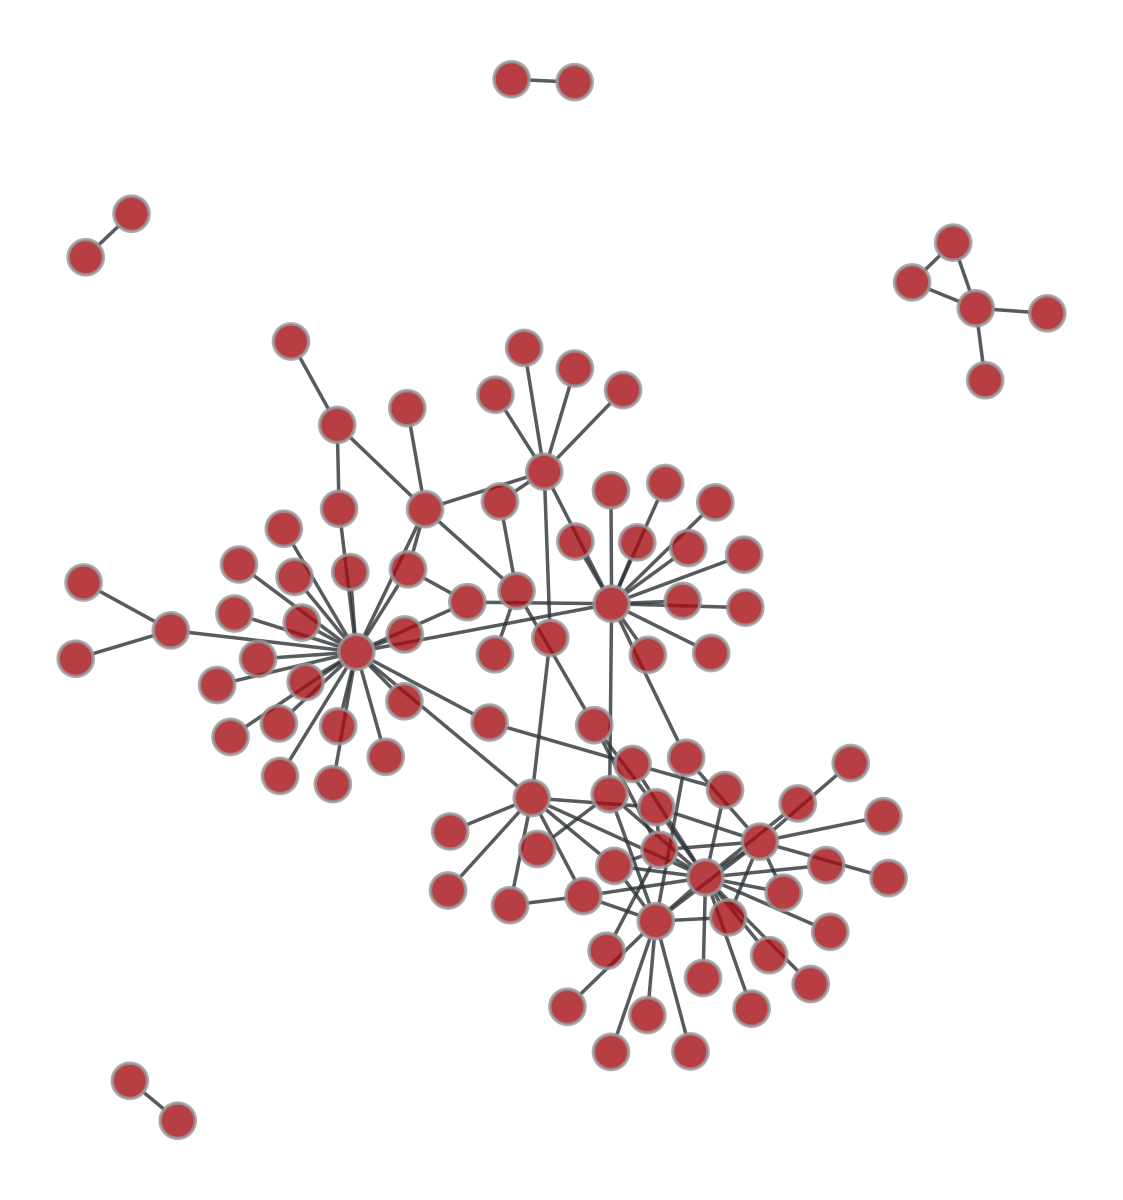

In [8]:
# Adding nodes based on preferential attachment
meta_sim = MetaSimulator(
    network_name="montagna_calls",
    ratio_honest=0.8,
    ratio_wolf=0.1,
    k=6,
    prob=0.4,
    attachment_method="small-world",
)
simulators = SimMartVaq(meta_sim.network)


plotter = Plotter()
plotter.args.draw_network = "n"
plotter.draw_network(network=simulators.network, color_vertex_property="status_color")


filtering = simulators.network.new_vertex_property("bool")
simulators.network.vertex_properties["filtering"] = filtering
for i in range(0, simulators.network.num_vertices()):
    if simulators.network.vp.status[simulators.network.vertex(i)] == "c":
        simulators.network.vp.filtering[simulators.network.vertex(i)] = 1
    else:
        simulators.network.vp.filtering[simulators.network.vertex(i)] = 0


simulators.network.set_vertex_filter(simulators.network.vp.filtering)
print(f"{simulators.network.num_vertices()=}")
plotter.draw_network(simulators.network)